# Capstone Regression Project

# King County, Washington Home Sale Price Analysis

Marie-Gisele Boyogueno

![](./Images/KingCounty3.png)

## Business Understanding

Pulte Homes Inc., the Real Estate companies in King County, Washington want to know how the housing market behaves in the area based on some of the features we will be analyzing. 
They also want to know what kind of renovations they can make to resolve or increase their business profits; also want to ensure that the customer is receiving a competitive and fair price.
Buying a house can be an exciting, yet overwhelming event in someone’s life. First time buyers usually don't think about important features that could impact the price of houses.
By analyzing different features that give value to a home, I want to help my stakeholder decide which one to include so that they can have a better return on investment as well as high buyer satisfaction.
This can eventually make this process more exciting, affordable and above all get both parties the most out of their investment.



![](./Images/Floorplan2.jpg)

## Data Understanding

    
The Data will be using is from King County Home Sales which contains data for 2021-2022 home sales 
in King County, Washington.

**Terminology**

**Target**

- Value we are predicting

- Dependents variable

**Features**
    
- Any columns being used to make predictions

- Independent variable(s)

**Metric**
    
- Values used to gauge how well model is performing 


Below are the columns description representing important feature to consider when looking for a house:
        `id` - Unique identifier for a house
    
* `date` - Date house was sold

* `price` - Sale price (prediction target)

* `bedrooms` - Number of bedrooms

* `bathrooms` - Number of bathrooms

* `sqft_living` - Square footage of living space in the home

* `sqft_lot` - Square footage of the lot

* `floors` - Number of floors (levels) in house

* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish,
    other lake, and river/slough waterfronts
    
* `greenbelt` - Whether the house is adjacent to a green belt

* `nuisance` - Whether the house has traffic noise or other recorded nuisances

* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound,
    Lake Washington, Lake Sammamish, small lake / river / creek, and other
    
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  
* `heat_source` - Heat source for the house

* `sewer_system` - Sewer system for the house

* `sqft_above` - Square footage of house apart from basement

* `sqft_basement` - Square footage of the basement

* `sqft_garage` - Square footage of garage space

* `sqft_patio` - Square footage of outdoor porch or deck space

* `yr_built` - Year when house was built

* `yr_renovated` - Year when house was renovated

* `address` - The street address

* `lat` - Latitude coordinate

* `long` - Longitude coordinate



## Data Preparation

### Loading the Data

In [1]:
#Numpy and Pandas Libraries
import pandas as pd 
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data

kcdf_base = pd.read_csv("./data/kc_house_data.csv")
kcdf_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
### Making  a copy of my kcdf_base

kcdf = kcdf_base.copy()

### Data Exploration

In [4]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
kcdf.shape

(30155, 25)

In [6]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
#droping ID column

kcdf.drop(labels='id',axis=1,inplace=True)
kcdf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [8]:
#checking the type and then format the  date

kcdf.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

**Renaming the date column for a bettera understanding of what this column does**

In [9]:
#renaming the date column

rnmdate = {'date':'selldate'}
kcdf.rename(columns=rnmdate,inplace=True)
kcdf.head(2)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [10]:
# changing the format of the date to a datetime object

kcdf.selldate = kcdf.selldate.apply(lambda x: pd.to_datetime (x, yearfirst=True))

In [11]:
# Rechecking the selldate type

kcdf.dtypes

selldate         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [12]:
kcdf.head(2)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [13]:
# Checking the correlation of the numerical features with our target variable(price)

kcdf.corr()["price"]

price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

**Creating year_old column**

In [14]:
kcdf['year_old'] = np.where(kcdf['yr_renovated'] != 0,kcdf.selldate.apply(lambda x: x.year) - kcdf['yr_renovated'], 
                             kcdf['selldate'].apply(lambda x: x.year) - kcdf['yr_built']) 

In [15]:
# checking the new column was added to the dataframe
kcdf.head(2)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71


### Data Cleaning

In [16]:
#address cleaning -- extracting the zip code and creating a zip code column 
kcdf.address[1]

'11231 Greenwood Avenue North, Seattle, Washington 98133, United States'

In [17]:
# get a list of 4 elts, and then can index

kcdf.address[1].split(',')

['11231 Greenwood Avenue North',
 ' Seattle',
 ' Washington 98133',
 ' United States']

In [18]:
# we want the last five

kcdf.address[1].split(',')[2][-5:]

'98133'

In [19]:
#creating the col zipcode  using the lambda function

kcdf['zipcode']= kcdf.address.apply(lambda x: x[-20:-15])

In [20]:
# checking the new column was added to the dataframe

kcdf.head(2)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133


In [21]:
## Extracting the city and then creating a column 'city'

In [22]:
kcdf.address[1]

'11231 Greenwood Avenue North, Seattle, Washington 98133, United States'

In [23]:
kcdf.address[1].split(',')

['11231 Greenwood Avenue North',
 ' Seattle',
 ' Washington 98133',
 ' United States']

In [24]:
kcdf.address[1].split(',')[1]

' Seattle'

In [25]:
#creating a city column

kcdf['city'] = kcdf['address'].apply(lambda x: x.split(',')[1])
kcdf.head(2)

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old,zipcode,city
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055,Renton
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133,Seattle


**Let's check for the missing data**

In [26]:
# to get the percentage of missing values before deciding what to do with

kcdf.isna().sum()/kcdf.shape[1]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      1.185185
sewer_system     0.518519
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
year_old         0.000000
zipcode          0.000000
city             0.000000
dtype: float64

In [27]:
#removing missing values from the following columns
kcdf.dropna(subset = ['heat_source', 'sewer_system'], axis=0, inplace=True)

In [28]:
#checking that we took care of the missing values
kcdf.isna().sum()/kcdf.shape[1]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
year_old         0.0
zipcode          0.0
city             0.0
dtype: float64

In [29]:
kcdf.shape

(30111, 27)

<AxesSubplot:>

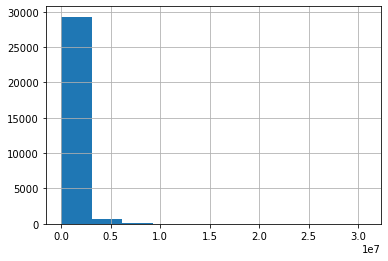

In [30]:
kcdf['price'].hist()

### Dealing with categorical variables 

**We're going to use pd.get_dommy to get the categorical dummy variables**

In [31]:
kcdf[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']]

,waterfront,greenbelt,nuisance,view,condition,grade
0,NO,NO,NO,NONE,Good,7 Average
1,NO,NO,YES,AVERAGE,Average,7 Average
2,NO,NO,NO,AVERAGE,Average,7 Average
3,NO,NO,NO,AVERAGE,Average,9 Better
4,NO,NO,YES,NONE,Average,7 Average
...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good
30151,NO,NO,NO,FAIR,Average,7 Average
30152,NO,NO,YES,NONE,Average,7 Average
30153,NO,NO,NO,NONE,Average,8 Good


In [32]:
kcdf[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']].value_counts()

waterfront  greenbelt  nuisance  view     condition  grade        
NO          NO         NO        NONE     Average    8 Good           4863
                                                     7 Average        4448
                                          Good       7 Average        2931
                                          Average    9 Better         2083
                                          Good       8 Good           1447
                                                                      ... 
                       YES       AVERAGE  Poor       7 Average           1
                                                     6 Low Average       1
YES         NO         NO        AVERAGE  Very Good  9 Better            1
NO          NO         YES       AVERAGE  Poor       5 Fair              1
YES         YES        NO        AVERAGE  Good       12 Luxury           1
Length: 470, dtype: int64

## Modeling

### Baseline Model

In [33]:
kcdf.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'year_old', 'zipcode', 'city'],
      dtype='object')

## Visualizing a subset of categorical feature

In [34]:
#setting up my categorical subset without address and zipcode feature (getting the numerica features)

kcdf_cat_subset = kcdf[['price', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
                            'heat_source', 'sewer_system']]
kcdf_cat_subset

,price,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,675000.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,920000.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,311000.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,775000.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,592500.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC
...,...,...,...,...,...,...,...,...,...
30150,1555000.0,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC
30151,1313000.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC
30152,800000.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC
30153,775000.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC


## Visualize Relationships Between Categorical Features and Target

## For each feature in the subset, create a plot that shows the feature on the x-axis and `price` on the y-axis.

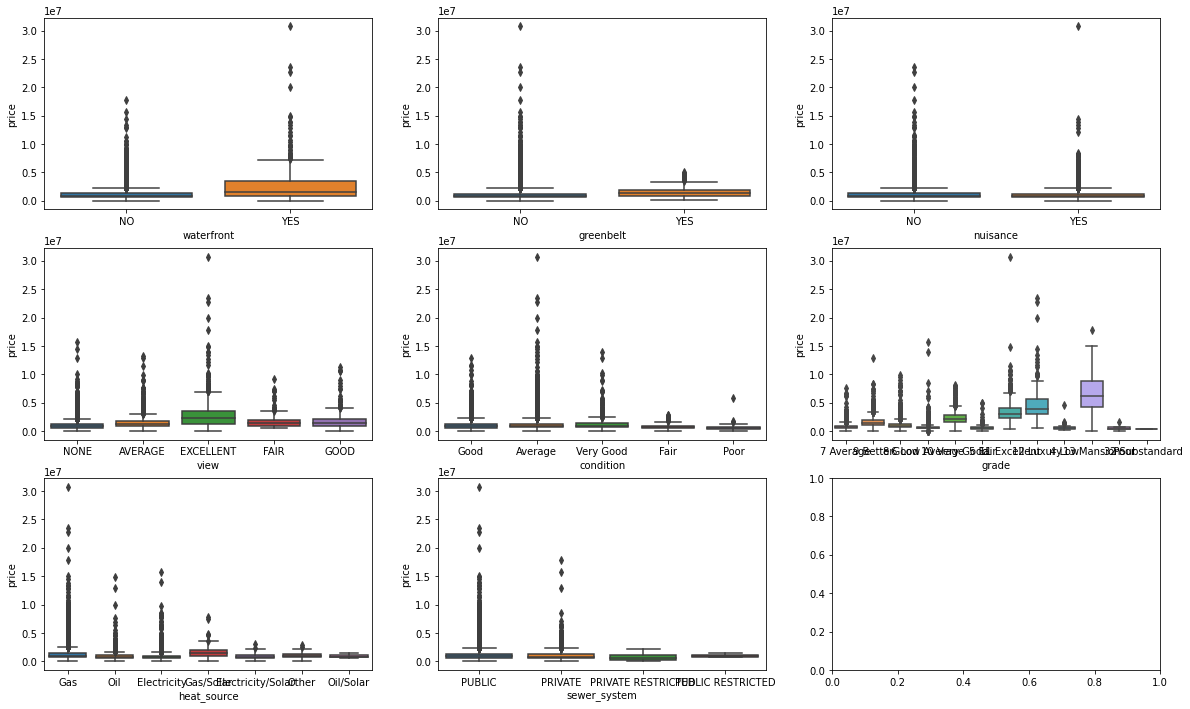

In [35]:
from matplotlib import pyplot as plot

plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='waterfront', y='price', data=kcdf)
plot.subplot(3,3,2)
sns.boxplot(x='greenbelt', y='price', data=kcdf)
plot.subplot(3,3,3)
sns.boxplot(x='nuisance', y='price', data=kcdf)
plot.subplot(3,3,4)
sns.boxplot(x='view', y='price', data=kcdf)
plot.subplot(3,3,5)
sns.boxplot(x='condition', y='price', data=kcdf)
plot.subplot(3,3,6)
sns.boxplot(x='grade', y='price', data=kcdf)
plot.subplot(3,3,7)
sns.boxplot(x='heat_source', y='price', data=kcdf)
plot.subplot(3,3,8)
sns.boxplot(x='sewer_system', y='price', data=kcdf)
plot.subplot(3,3,9)
plot.show()

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:


In [36]:
#we isolating the categorical columns
preds_cols = [x for x in kcdf.columns if x not in ['selldate', 'price', 'waterfront', 
                                                   'greenbelt', 
                                                   'nuisance', 
                                                   'view', 
                                                   'condition', 
                                                   'grade', 
                                                   'heat_source', 
                                                   'sewer_system',
                                                   'address', 
                                                   'zipcode', 'city']]

In [37]:
#these are the columns we want(these are the numerical column)

preds_cols 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'year_old']

## Creating baseline model predictor dataframe and target

In [38]:
#creating baseline model predictor dataframe and target

preds = kcdf[preds_cols]
target = kcdf.price

In [39]:
y = target
X_baseline = preds

In [40]:
X_baseline.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,year_old
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052,53
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591,71
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520,65
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020,11
4,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188,9


In [41]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [42]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1531.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:05:40   Log-Likelihood:            -4.4734e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30096   BIC:                         8.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.264e+06   1.57e+06     -3.345

In [43]:
# Comparing the performance of our strongest correlated features and the dummies features (coefficients and p-values) -- GH Sol

results_df = pd.concat([baseline_results.params, baseline_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df

,coefficient,p-value
const,-5.264499e+06,8.242742e-04
bedrooms,-1.668762e+05,6.008014e-202
bathrooms,1.410720e+05,3.280292e-68
sqft_living,3.357764e+02,6.195616e-75
sqft_lot,-9.159109e-02,1.760921e-01
floors,-1.526379e+03,8.774980e-01
sqft_above,2.879607e+02,1.649284e-53
sqft_basement,1.626750e+02,1.714994e-32
sqft_garage,-1.452075e+02,2.887087e-14
sqft_patio,2.606295e+02,1.185980e-47


**Interpretation of our baseline model**

Although the sqft_living was the attribute most strongly correlated with price,  we also get the OLS summary for  all features to understand how our baseline model is describing thieir relationship with the target. 

- Both R-squared and adjusted R-squared are .416,  this means that our model explains about 42% of the variance in Price.

- Overall our model and coefficients are statistically significant, with most p-values well below a standard alpha of 0.05;

therefore, our model is statistically significant.

For this reason, we can say this model is statistically significant and explains about 42% of the variance in price; 

the overall model is not trustworthy base on these results;

It depends on what these values represent, whether this R-Squared is good enough for our use case.

The intercept is at about -5.264,000k, this means that:
    
- A home with zero bathrooms would sell below 526,000k and the coefficient for bathrooms is about -14,1100k; which means for each additional bathroom , the house price increases by $14,110 more.

- A zero-sqft_living home would sell below 526,000k and the coefficient for qft_living is about .336k; which means for each additional qft_living , the house costs about $.336k more.

- Our coefficient for sqft_above is about 287k, which means that for each additional squarefoot of above ground , we expect the price to increase about $287.

- Our coefficient for sqft_basement is about 162k, which means that for each additional squarefoot of basdement, we expect the price to increase about $162.

- Our coefficient for sqft_basement  is about 162k, which means that for each additional squarefoot of basement, we expect the price to increase about $162.

- Our coefficient for sqft_patio  is about 260k, which means that for each additional squarefoot of patio, we expect the price to increase about $260.

- Our coefficient for yr_built is about 2,500k, which means that for each additional year in the market , we expect the price to increase about $2,500k.

- Our coefficient for yr_renovated is about 221k, which means that for each additional renovation , we expect the price to increase about $221k.

- Our coefficient for year_old  is about 5941k, which means that for each additional number of year in the market, we expect the price to increase about $5941k.

- Also the location add value to our home price as well.

- Few feature like bedrooms, sqft_lot , floors, sqft_garage    in our model do not add value to our model. 


### Model Iteration

## Improving my baseline model

In [44]:
# Creating our dumnmny variables
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade','heat_source', 'sewer_system']

kcdf_cat_dummy = pd.get_dummies(data=kcdf, columns=cat_columns, drop_first=True)


In [45]:
kcdf_cat_dummy.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'year_old',
       'zipcode', 'city', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [46]:
#running our model again with dummied preodictor
# our new X and y

X_iterated = kcdf_cat_dummy.drop(labels=['selldate', 'price', 'zipcode', 'address', 'city'], axis=1)
y = kcdf_cat_dummy.price

In [47]:
X_iterated.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,...,0,0,1,0,0,0,0,0,1,0
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,...,0,0,0,0,1,0,0,0,1,0
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,...,0,0,1,0,0,0,0,0,1,0
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,...,1,0,1,0,0,0,0,0,1,0
4,2,2.0,1120,758,2.0,1120,550,550,30,2012,...,0,0,0,0,0,0,0,0,1,0


In [48]:
first_dummy_model = sm.OLS(y, sm.add_constant(X_iterated))
first_dummy_results = first_dummy_model.fit()

In [49]:
print(first_dummy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     754.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:05:41   Log-Likelihood:            -4.4405e+05
No. Observations:               30111   AIC:                         8.882e+05
Df Residuals:                   30065   BIC:                         8.886e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [50]:
results_df = pd.concat([first_dummy_results.params, first_dummy_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
#results_df
results_df.head(14)

,coefficient,p-value
const,-2.622939e+06,6.396848e-02
bedrooms,-5.646897e+04,9.419311e-28
bathrooms,9.666071e+04,5.446181e-39
sqft_living,9.983359e+01,3.675628e-09
sqft_lot,2.822531e-01,1.242142e-05
floors,-5.528023e+04,2.759135e-09
sqft_above,2.128044e+02,5.702817e-35
sqft_basement,1.266683e+02,3.370691e-23
sqft_garage,-1.794730e+02,4.701068e-24
sqft_patio,1.359421e+02,3.196768e-16


**Interpretation of our first iterated model**

In the context of a multiple regression mode, both our  R-squared and adjusted R-squared have improved. Overall our dummies model performed slightly better than the baseline model. Our new model is statistically significant and explained about 53% of the variance in price.

The intercept is at about -2.6k, this means that a zero condition house, with a Good condition  level, would sell for 2.6k . The coefficient for a house with a Good condition is about  357k, this mean that for each additional good condition level, the house price will increase by 357k.
We note that this is very similar to the bathroom  coefficient for the baseline model, meaning that condition stage seem to be explaining different aspects of price. Overall must feature in this dummy’s model seem to explain different aspect of the price as well.


In [51]:
kcdf_cat_dummy.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,...,0.202460,-0.008445,0.142218,0.036678,-0.068180,-0.002273,0.001120,-0.004206,0.021186,-0.001267
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,...,0.156576,0.001152,0.228732,0.014286,-0.091664,-0.007826,-0.018820,-0.013354,0.033922,0.002562
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,...,0.258100,0.001854,0.271900,0.032530,-0.252576,-0.007600,-0.014822,-0.004870,0.034031,0.001846
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,...,0.294754,-0.006556,0.273316,0.031869,-0.143052,-0.002970,-0.005215,-0.009285,-0.061600,0.000513
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,...,0.018501,-0.002644,-0.071191,0.001292,0.010227,-0.001386,0.059848,0.002890,-0.360725,-0.002057
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,...,0.275449,0.026365,0.120942,0.001533,-0.221423,-0.005958,-0.001975,-0.000987,0.133260,0.013886
sqft_above,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,...,0.312175,-0.008119,0.291672,0.016159,-0.168613,-0.006177,-0.003596,-0.010372,-0.081848,0.002592
sqft_basement,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,...,-0.004654,-0.002454,-0.015723,0.031675,0.120436,0.005733,-0.003918,-0.001659,0.044760,-0.002266
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,...,0.185548,-0.010929,0.302288,0.003343,-0.198317,-0.010710,-0.009021,-0.007238,-0.122329,-0.000017
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,...,0.151001,0.010221,0.032665,0.014081,-0.100851,-0.005284,0.009748,0.005283,-0.182082,0.005936


### Second model: running the model again and drop the feature of the first model with higher P_values and run the results summary


In [52]:
X_second = kcdf_cat_dummy.drop(labels=['price','selldate','zipcode', 'address','city', 'greenbelt_YES','view_GOOD','condition_Poor',
                                        'heat_source_Gas','heat_source_Oil','heat_source_Oil/Solar', 
                                          'heat_source_Other','heat_source_Electricity/Solar', 
                                         'grade_2 Substandard','sewer_system_PRIVATE RESTRICTED',
                                          'sewer_system_PUBLIC RESTRICTED'], axis=1)
y = kcdf_cat_dummy.price

In [53]:
X_second.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Gas/Solar,sewer_system_PUBLIC
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,...,0,0,0,0,0,1,0,0,0,1
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,...,0,0,0,0,0,1,0,0,0,1
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,...,0,0,0,0,0,1,0,0,0,1
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,...,0,0,0,0,0,0,0,1,0,1
4,2,2.0,1120,758,2.0,1120,550,550,30,2012,...,0,0,0,0,0,1,0,0,0,1


In [54]:
X_second.dtypes

bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
sqft_above                 int64
sqft_basement              int64
sqft_garage                int64
sqft_patio                 int64
yr_built                   int64
yr_renovated               int64
lat                      float64
long                     float64
year_old                   int64
waterfront_YES             uint8
nuisance_YES               uint8
view_EXCELLENT             uint8
view_FAIR                  uint8
view_NONE                  uint8
condition_Fair             uint8
condition_Good             uint8
condition_Very Good        uint8
grade_11 Excellent         uint8
grade_12 Luxury            uint8
grade_13 Mansion           uint8
grade_3 Poor               uint8
grade_4 Low                uint8
grade_5 Fair               uint8
grade_6 Low Average        uint8
grade_7 Average            uint8
grade_8 Go

In [55]:
X_second.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'year_old', 'waterfront_YES',
       'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Gas/Solar', 'sewer_system_PUBLIC'],
      dtype='object')

In [56]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

second_dummy_model = sm.OLS(y, sm.add_constant(X_second))
second_dummy_results = second_dummy_model.fit()

In [57]:
print(second_dummy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     998.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:05:41   Log-Likelihood:            -4.4406e+05
No. Observations:               30111   AIC:                         8.882e+05
Df Residuals:                   30076   BIC:                         8.885e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.591e+

In [58]:
results_df = pd.concat([second_dummy_results.params, second_dummy_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
#results_df
results_df.head(14)

,coefficient,p-value
const,-2.590785e+06,6.716219e-02
bedrooms,-5.641436e+04,9.740965e-28
bathrooms,9.671430e+04,1.756185e-39
sqft_living,1.003224e+02,2.788536e-09
sqft_lot,2.784407e-01,1.534408e-05
floors,-5.635801e+04,1.176235e-09
sqft_above,2.138104e+02,1.137389e-35
sqft_basement,1.264145e+02,2.046514e-23
sqft_garage,-1.767884e+02,6.713586e-24
sqft_patio,1.344651e+02,5.243624e-16


**Interpretation of our second iterated model**

Our intercept is different than the previous model,the dummy's model,
but our R-squared and Adj. R-squared did not improve and still explaine 53% of the variance in the house price. So getting rid of the P-values that ar higher than the conventional one of .05 did not improve our new model


## Final Model

### Final model will drop outliers in few features of my choice then filter them and create a new df, then run another model

#### Visualising the numerical columns to check outliers as well as the categorical one 

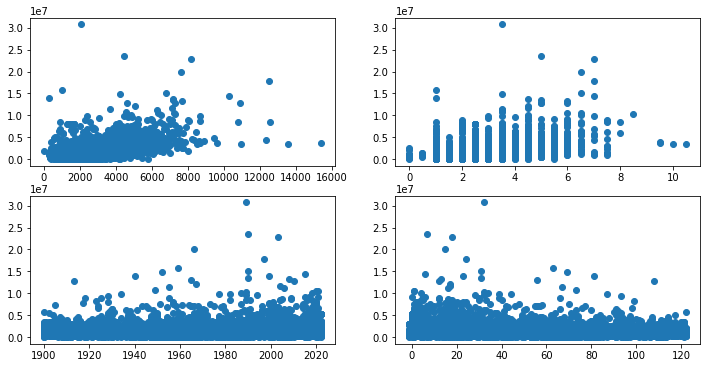

In [59]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,6) )
#plt.figure(figsize=(12,6))
ax1.scatter(kcdf.sqft_living, y=kcdf.price)
ax2.scatter(kcdf.bathrooms, y=kcdf.price)
ax3.scatter(kcdf.yr_built, y=kcdf.price)
ax4.scatter(kcdf.year_old, y=kcdf.price);

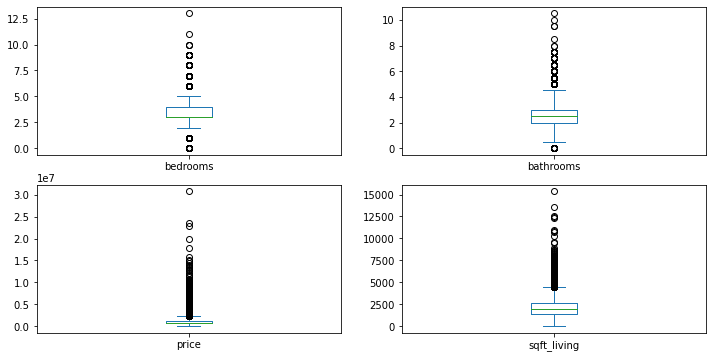

In [60]:
#checking for outliers using boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

kcdf.bedrooms.plot(ax=axes[0,0], kind='box')
kcdf.bathrooms.plot(ax=axes[0,1], kind='box')
kcdf.price.plot(ax=axes[1,0], kind='box')
kcdf.sqft_living.plot(ax=axes[1,1], kind='box');

**Here we see that there is an outlier between zero and one in the bathroom feature, which could mean that this is not a living house or this suggest that there could not be a house with zero bathrooms**

## Cleaning the outliers in these chosen most correlated feature

In [61]:
kcdf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,year_old
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872,43.539172
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073,31.300361
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075,17.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790,41.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394,65.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,122.000000


In [62]:
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns

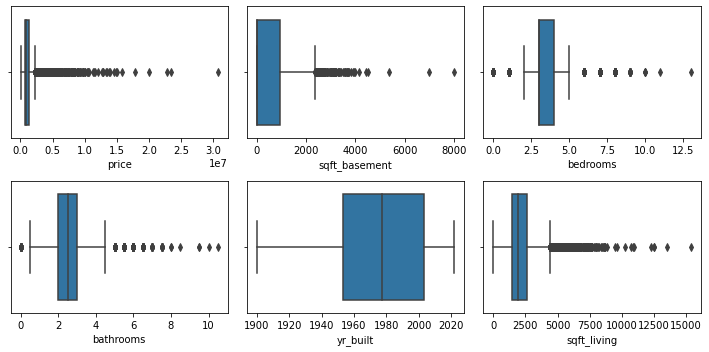

In [63]:
# function to check outliers for the dataset using the boxplot and Seaborn library.

def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(kcdf['price'], ax = axs[0,0])
    plt2 = sns.boxplot(kcdf['sqft_basement'], ax = axs[0,1])
    plt3 = sns.boxplot(kcdf['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(kcdf['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(kcdf['yr_built'], ax = axs[1,1])
    plt3 = sns.boxplot(kcdf['sqft_living'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

In [64]:
kcdf['price'].describe()

count    3.011100e+04
mean     1.108971e+06
std      8.965158e+05
min      2.736000e+04
25%      6.492360e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [65]:
# filtering using dloc and cond
kcdf2 = kcdf.loc[(kcdf['bedrooms'] >= 1) & (kcdf['bedrooms'] <= 6)]

In [66]:
# filtering using dloc and cond
kcdf2 = kcdf.loc[(kcdf['price'] >= 25000) & (kcdf['price'] <= 2500000)]

In [67]:
kcdf2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,year_old
count,2.862400e+04,28624.000000,28624.000000,28624.000000,2.862400e+04,28624.000000,28624.000000,28624.000000,28624.000000,28624.00000,28624.000000,28624.000000,28624.000000,28624.000000,28624.000000
mean,9.675658e+05,3.373044,2.266210,2014.199832,1.570744e+04,1.528612,1729.478305,455.924679,318.241406,205.51069,1974.605191,84.461047,47.317274,-121.299446,44.251467
std,4.714211e+05,0.957188,0.809081,823.533299,5.387009e+04,0.567234,764.681534,547.045841,274.693874,230.09684,31.907188,402.046957,1.453588,5.779212,31.215914
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.00000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,6.350000e+05,3.000000,2.000000,1400.000000,4.760750e+03,1.000000,1160.000000,0.000000,0.000000,40.00000,1953.000000,0.000000,47.393935,-122.328635,17.000000
50%,8.400000e+05,3.000000,2.500000,1880.000000,7.350000e+03,1.500000,1520.000000,0.000000,380.000000,140.00000,1977.000000,0.000000,47.543910,-122.231485,42.000000
75%,1.212000e+06,4.000000,2.500000,2500.000000,1.020700e+04,2.000000,2160.000000,920.000000,500.000000,300.00000,2003.000000,0.000000,47.670591,-122.115588,66.000000
max,2.500000e+06,11.000000,7.500000,8020.000000,3.067495e+06,4.000000,6630.000000,3560.000000,3580.000000,4370.00000,2022.000000,2022.000000,64.824070,-70.074340,122.000000


In [68]:
kcdf2.dtypes

selldate         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
year_old                  int64
zipcode                  object
city                     object
dtype: object

In [69]:
# filtering mlore features


kcdf2 = kcdf[(kcdf.bathrooms <= 5) & (kcdf.bedrooms <= 6) & (kcdf.sqft_living <= 5000) & (kcdf.sqft_lot <= 1000000)& (kcdf.price <= 3500000)
            &(kcdf.sqft_basement <= 2500) & (kcdf.sqft_above <= 5000)]
 

''

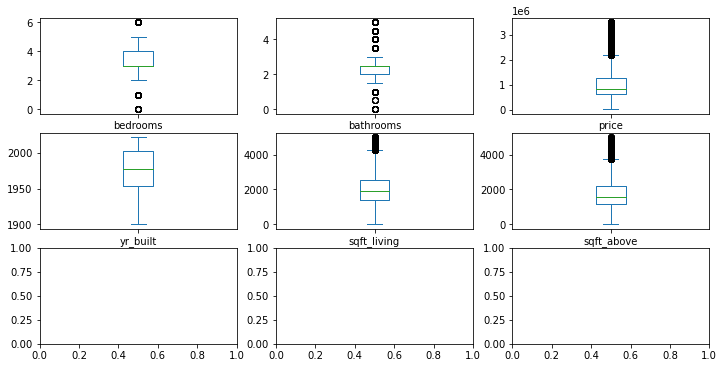

In [70]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,6))

kcdf2.bedrooms.plot(ax=axes[0,0], kind='box')
kcdf2.bathrooms.plot(ax=axes[0,1], kind='box')
kcdf2.price.plot(ax=axes[0,2], kind='box')
kcdf2.yr_built.plot(ax=axes[1,0], kind='box')
kcdf2.sqft_living.plot(ax=axes[1,1], kind='box')
kcdf2.sqft_above.plot(ax=axes[1,2], kind='box')

;

**Verify the outliers do not exist  by calling the function below**

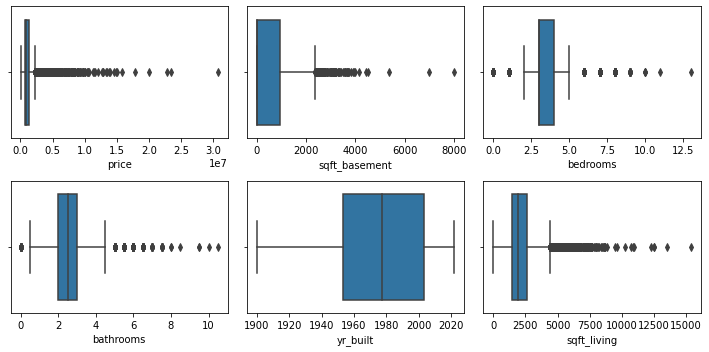

In [71]:
detectOutliers()

In [72]:
# creating final  X and y

#X_final = kcdf2_subset.drop(labels=['price'], axis=1)
#y = kcdf2_subset.price

X_final = kcdf2.drop(labels=['price','selldate', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
                             'heat_source', 'sewer_system', 'address', 'zipcode', 'city'], axis=1)
y = kcdf2.price

In [73]:
X_final.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,year_old
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052,53
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591,71
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520,65
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020,11
4,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188,9


## Regression Results

In [74]:
final_model = sm.OLS(y, sm.add_constant(X_final))
final_results = final_model.fit()

In [75]:
print(final_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1553.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:05:44   Log-Likelihood:            -4.2025e+05
No. Observations:               29218   AIC:                         8.405e+05
Df Residuals:                   29203   BIC:                         8.406e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.43e+06   1.02e+06      1.409

In [76]:
results_df = pd.concat([final_results.params, final_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
#results_df
results_df.head(14)

,coefficient,p-value
const,1.430359e+06,1.589158e-01
bedrooms,-8.405166e+04,2.361191e-112
bathrooms,9.680839e+04,7.108604e-73
sqft_living,2.733737e+02,2.983140e-110
sqft_lot,-1.995499e-01,8.740697e-04
floors,5.727704e+04,2.847101e-19
sqft_above,1.683981e+02,9.331173e-42
sqft_basement,9.415018e+01,7.671147e-26
sqft_garage,-1.498790e+01,2.267553e-01
sqft_patio,1.386407e+02,1.159896e-31


**Final model Interpretation**

In this final model, both our R-squared and adjusted R-squared have not improved. Overall our final model has not performed better than the first dummy and second models. 
Overall our model and coefficients are statistically significant, with most p-values well below a standard alpha of 0.05; and explained only about 43% of the variance in the housing prices. But with some outliers removed in some of the features, this model is more accurate and could be trusted better than the first and second one.

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion

Overall, all of our R-squared and adjusted R-squared have slightgtly improved from our baseline model. Also, even though our final model has not performed better than the first dummy and second models. 
Overall , all of our models and coefficients are statistically significant, with most p-values well below a standard alpha of 0.05. Our final model explained only about 43% of the variance in the housing prices, but if we take into conderation that some outliers were removed in some of the features, this model is more accurate and could be trusted better than the first and second one.